# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/Apress/applied-deep-learning

# One-dimensional linear regression with tensorflow

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.datasets.samples_generator import make_regression

# Dataset 

In [4]:
Xdata = np.array([4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
Ydata = np.array([33, 42, 45, 51, 53, 61, 62])

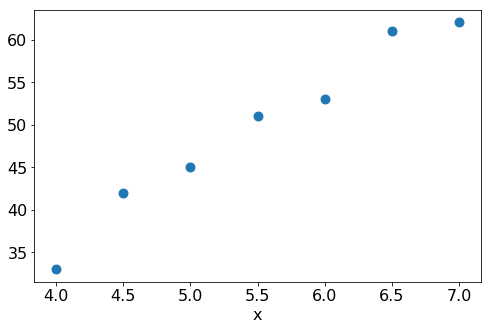

In [5]:
plt.figure(figsize=(8,5))

plt.scatter(Xdata,Ydata, s = 80)
plt.xlabel('x', fontsize= 16)
plt.tick_params(labelsize=16)

The points seems to stay on a line, so a linear regression could actually work. 

# Building Phase

Let's build our neural network. That would be one single neuron, with an identity activation function

In [6]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [1, None]) # Inputs
Y = tf.placeholder(tf.float32, [1, None]) # Labels
learning_rate = tf.placeholder(tf.float32, shape=())

W = tf.Variable(tf.ones([1, 1])) # Weights
b = tf.Variable(tf.zeros(1)) # Bias

init = tf.global_variables_initializer()

y_ = tf.matmul(tf.transpose(W),X)+b # Output of neuron
mse = tf.reduce_mean(tf.square(y_ - Y)) # node to evaluate the mse if needed

We need additional nodes:

- The cost function $J$
- A node that will minimize the cost function

In [7]:
cost = tf.reduce_mean(tf.square(y_-Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Reshaping the dataset

Now we expect $X$ and $Y$ as tensors with one rows. If we check what we have

In [8]:
print(Xdata.shape)
print(Ydata.shape)

(7,)
(7,)


Is not what we need... So we can reshape them in this way

In [9]:
x = Xdata.reshape(1,-1)
y = Ydata.reshape(1,-1)

The -1simply means that it is an unknown dimension and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the criteria: "The new shape should be compatible with the original shape"

In [10]:
print(x.shape)
print(y.shape)

(1, 7)
(1, 7)


That is better now... To be able to test various learning rates we can define a function to do the training

In [11]:
def run_linear_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
    
        if (epoch % 1000 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

In [12]:
sess, ch = run_linear_model(0.1, 1000, x, y, True)

Reached epoch 0 cost J = 59688.492188
Reached epoch 1000 cost J = nan


Interesting... Let's try a smaller learning rate

In [17]:
sess, ch = run_linear_model(1e-3, 1000, x, y, True)

Reached epoch 0 cost J = 1766.197388
Reached epoch 1000 cost J = 3.315676


In [32]:
sess2, ch2 = run_linear_model(1e-3, 5000, x, y, True)

Reached epoch 0 cost J = 1766.197388
Reached epoch 1000 cost J = 3.315676
Reached epoch 2000 cost J = 3.261549
Reached epoch 3000 cost J = 3.213741
Reached epoch 4000 cost J = 3.171512
Reached epoch 5000 cost J = 3.134215


Check $J$... Is still going down.

# Plot of the cost function

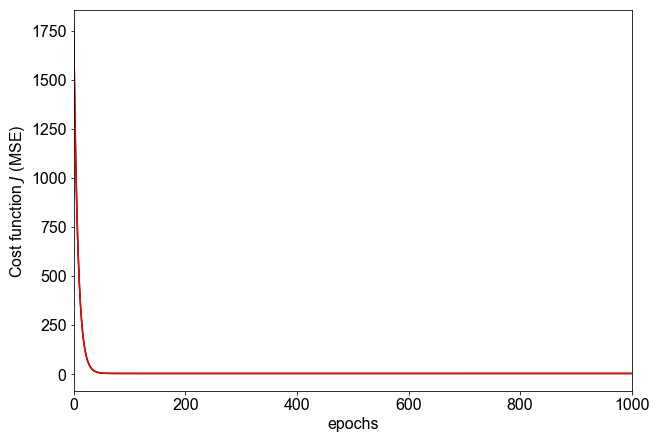

In [23]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(1, 1, 1)
ax.plot(ch, ls='solid', color = 'black')
ax.plot(ch2, ls='solid', color = 'red')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$ (MSE)', fontsize = 16)
plt.xlim(0,1000)
plt.tick_params(labelsize=16)

You don't see any difference... Let's zoom in

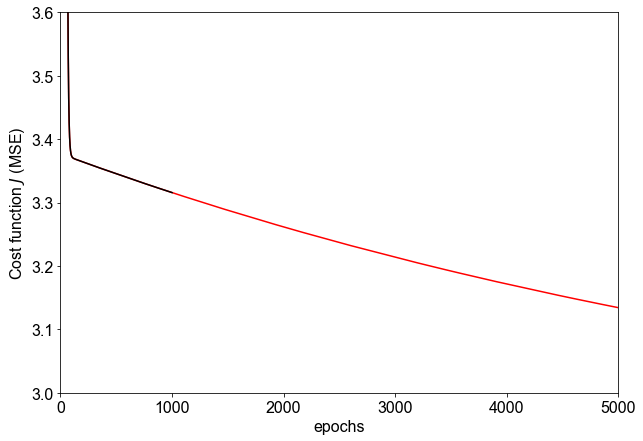

In [29]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(1, 1, 1)
ax.plot(ch2, ls='solid', color = 'red')
ax.plot(ch, ls='solid', color = 'black')
ax.set_ylim(3,3.6)
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$ (MSE)', fontsize = 16)
plt.xlim(0,5000)
plt.tick_params(labelsize=16)

Note that the learning rate is small, and so the convergence is slow... Let's try something faster...

In [31]:
sess3, ch3 = run_linear_model(1e-2, 5000, x, y, True)

Reached epoch 0 cost J = 258.081207
Reached epoch 1000 cost J = 3.003489
Reached epoch 2000 cost J = 2.895785
Reached epoch 3000 cost J = 2.864677
Reached epoch 4000 cost J = 2.855690
Reached epoch 5000 cost J = 2.853095


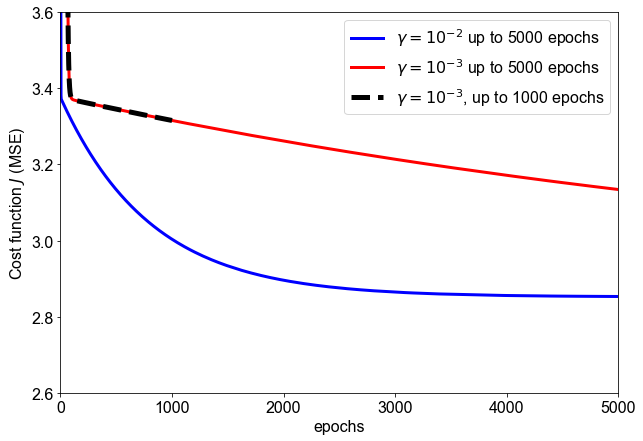

In [61]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(1, 1, 1)
ax.plot(ch3, ls='solid', lw = 3, color = 'blue', label = r"$\gamma = 10^{-2}$ up to 5000 epochs")
ax.plot(ch2, ls='solid', lw = 3, color = 'red', label = r"$\gamma = 10^{-3}$ up to 5000 epochs")
ax.plot(ch, ls='--', lw = 5, color = 'black',label = r"$\gamma = 10^{-3}$, up to 1000 epochs")
ax.set_ylim(2.6,3.6)
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$ (MSE)', fontsize = 16)
plt.xlim(0,5000)
plt.legend(fontsize = 16)
plt.tick_params(labelsize=16)

Now we are getting closer to something flattening...

For the sake of trying to find the best parameters

In [63]:
sess5, ch5 = run_linear_model(0.03, 5000, x, y, True)

Reached epoch 0 cost J = 1757.071655
Reached epoch 1000 cost J = 2.864616
Reached epoch 2000 cost J = 2.852342
Reached epoch 3000 cost J = 2.852049
Reached epoch 4000 cost J = 2.852042
Reached epoch 5000 cost J = 2.852038


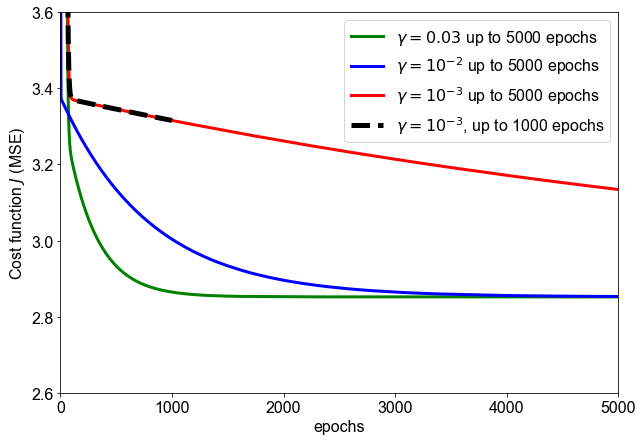

In [64]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(1, 1, 1)
ax.plot(ch5, ls='solid', lw = 3, color = 'green', label = r"$\gamma = 0.03$ up to 5000 epochs")
ax.plot(ch3, ls='solid', lw = 3, color = 'blue', label = r"$\gamma = 10^{-2}$ up to 5000 epochs")
ax.plot(ch2, ls='solid', lw = 3, color = 'red', label = r"$\gamma = 10^{-3}$ up to 5000 epochs")
ax.plot(ch, ls='--', lw = 5, color = 'black',label = r"$\gamma = 10^{-3}$, up to 1000 epochs")
ax.set_ylim(2.6,3.6)
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$ (MSE)', fontsize = 16)
plt.xlim(0,5000)
plt.legend(fontsize = 16)
plt.tick_params(labelsize=16)

So the value reached by the green or the blue line seems to be the one that can be reached... So both are good candidates...

# Predictions

In [36]:
pred_y = sess3.run(y_, feed_dict = {X: x, Y: y})
mse_y = sess3.run(mse, feed_dict = {X: x, Y: y})

print(mse_y)

2.8530948


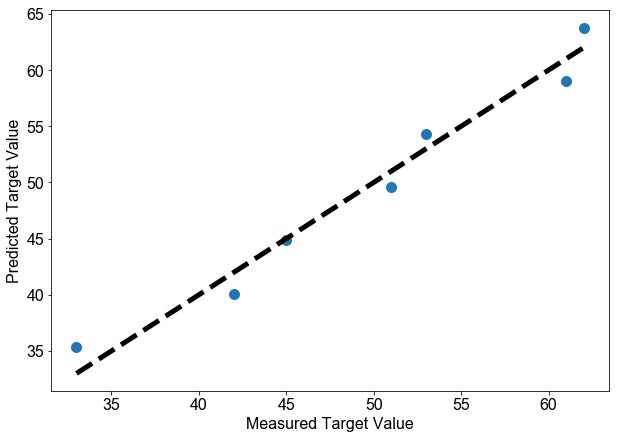

In [37]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y, pred_y, lw = 5)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 5)
ax.set_xlabel('Measured Target Value', fontsize = 16)
ax.set_ylabel('Predicted Target Value', fontsize = 16)
plt.tick_params(labelsize=16)

# How to find the weights?

Normally one is interested in the parameters of the linear regression. Typically when using NNs only the prediction are interested since the number of parameters is too big to be of any use, but is instructive to see how to get the parameters from our computational graph. Our linear equation is given by

$$
y = w x_1 + b
$$

And the $w$ is contained in the ```tf.Variable``` ```W```, and the bias in the ```tf.Variable``` ```b```. So to get them we can simply ask tensorflow to evaluate (with the open session) the right nodes 

In [40]:
W_ = sess3.run(W, feed_dict = {X: x, Y: y})
b_ = sess3.run(b, feed_dict = {X: x, Y: y})

The parameters are then given by

In [41]:
print(W_, b_)

[[9.468025]] [-2.4970763]


So we can plot the data with our best fit by first generating the right data to plot

In [42]:
x_ = np.arange(4, 7, 0.05).reshape(1,-1)
yfit_ = W_* x_+b_

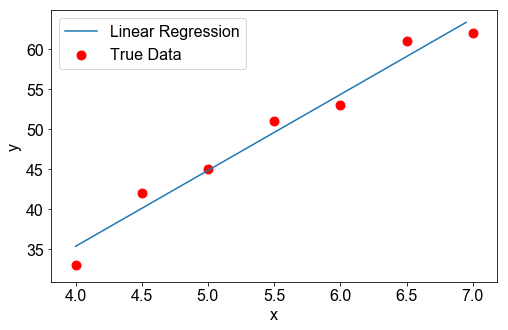

In [43]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_[0], yfit_[0], label = "Linear Regression")
ax.scatter (x,y, color = 'red', s = 80, label = "True Data")
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('y', fontsize = 16)
plt.legend(fontsize = 16)
plt.tick_params(labelsize=16)

# Comparison with classical linear regression

Now let's compare the results with a classical linear regression as we can do with ```sklearn```

In [45]:
xt = x.reshape(7,-1)
yt = y.reshape(7,-1)
reg = LinearRegression().fit(xt,yt)
reg.score(xt,yt)

0.9693665059184569

In [46]:
reg.coef_

array([[9.5]])

In [47]:
reg.intercept_ 

array([-2.67857143])

In [48]:
xt_ = x_[0].reshape(60,-1)
yfitsk_ = reg.predict(xt_.reshape(60,-1))

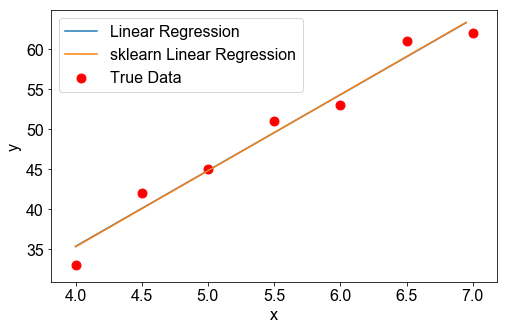

In [49]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_[0], yfit_[0], label = "Linear Regression")
ax.plot(x_[0], yfitsk_, label = "sklearn Linear Regression")
ax.scatter (x,y, color = 'red', s = 80, label = "True Data")
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('y', fontsize = 16)
plt.legend(fontsize = 16)
plt.tick_params(labelsize=16)

Graphically you cannot see any difference... Let's try to train the network longer.

In [51]:
sess4, ch4 = run_linear_model(1e-2, 15000, x, y, True)

Reached epoch 0 cost J = 258.081207
Reached epoch 1000 cost J = 3.003489
Reached epoch 2000 cost J = 2.895785
Reached epoch 3000 cost J = 2.864677
Reached epoch 4000 cost J = 2.855690
Reached epoch 5000 cost J = 2.853095
Reached epoch 6000 cost J = 2.852342
Reached epoch 7000 cost J = 2.852125
Reached epoch 8000 cost J = 2.852068
Reached epoch 9000 cost J = 2.852050
Reached epoch 10000 cost J = 2.852043
Reached epoch 11000 cost J = 2.852043
Reached epoch 12000 cost J = 2.852038
Reached epoch 13000 cost J = 2.852043
Reached epoch 14000 cost J = 2.852039
Reached epoch 15000 cost J = 2.852042


In [52]:
W_ = sess4.run(W, feed_dict = {X: x, Y: y})
b_ = sess4.run(b, feed_dict = {X: x, Y: y})

The parameters are then given by

In [53]:
print(W_, b_)

[[9.499927]] [-2.6781528]


from a classical linear fit we get

```9.5, -2.67857143```

so now we are very close!

# Exercise 1: difficulty medium

Build a network with one neuron (as we did before) and apply it to the following dataset, finding the best parameters of your linear regression equation.

In [26]:
X,y = make_regression(n_samples=50, n_features = 1, noise = 3)

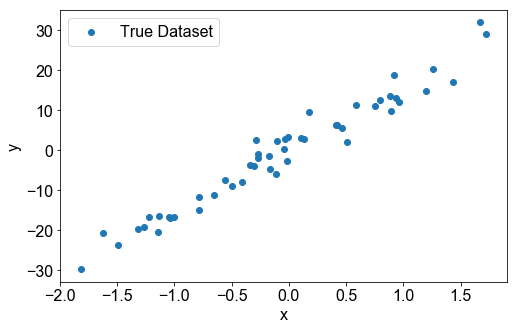

In [27]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, y, label = "True Dataset")
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('y', fontsize = 16)
plt.legend(fontsize = 16)
plt.tick_params(labelsize=16)

## Exercise 2: difficulty medium

Build a network with one neuron (as we did before) and apply it to the following dataset with 3 features, finding the best parameters of your linear regression equation.

In [41]:
X,y = make_regression(n_samples=50, n_features = 3, noise = 0.3)

In [42]:
X.shape

(50, 3)

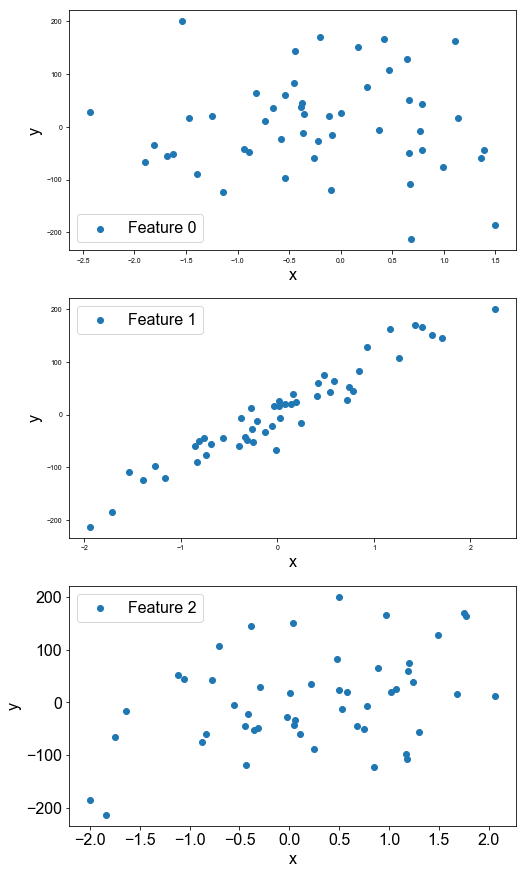

In [46]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
fig = plt.figure(figsize=(8, 15))
ax = fig.add_subplot(3, 1, 1)
ax.scatter(X[:,0], y, label = "Feature 0")
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('y', fontsize = 16)
plt.legend(fontsize = 16)

ax = fig.add_subplot(3, 1, 2)
ax.scatter(X[:,1], y, label = "Feature 1")
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('y', fontsize = 16)
plt.legend(fontsize = 16)

ax = fig.add_subplot(3, 1, 3)
ax.scatter(X[:,2], y, label = "Feature 2")
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('y', fontsize = 16)
plt.legend(fontsize = 16)
plt.tick_params(labelsize=16)
